1. Решите задачу распознавания рукописных цифр. Используйте для этого известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр размером 28x28. В имеющемся у Вас Colab-ноутбуке всюду замените fashion_mnist на mnist. Для тестирования результатов на реальных данных можете использовать приложенный архив с изображениями рукописных цифр, а также подготовьте свои картинки (например, в Paint). Попробуйте задавать разные конфигурации полносвязной нейронной сети, различные функции активации. Постарайтесь понять, с какими цифрами Ваш классификатор испытывает наибольшие сложности.

In [58]:
# Подключение библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [59]:
# Список с названиями классов
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [60]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

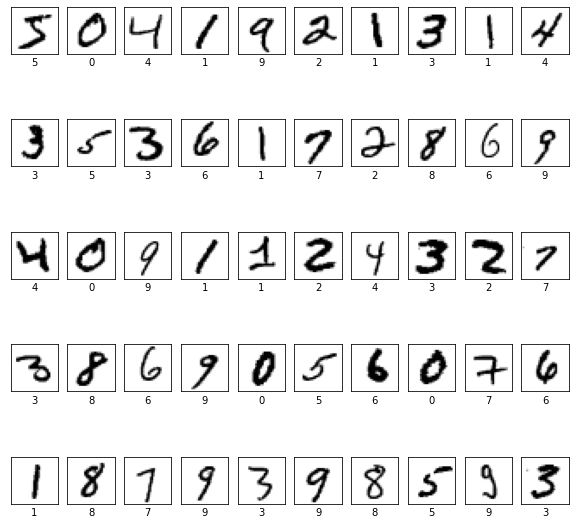

In [61]:
# Отображение некоторых изображений
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [62]:
# Преобразование размерности
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [63]:
# Приведение значений интенсивности пикслей к интервалу [0,1]
x_train = x_train / 255 
x_test = x_test / 255 

In [64]:
# Пример вывода ответа
n = 0
print(y_train[n])

5


In [65]:
# Преобразование меток классов в удобный формат для обучения (one hot encoding)
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [66]:
# Новый вид ответа
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [80]:
# Создание архитектуры нейронной сети
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="relu")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=400, activation="relu")) # 1 скрытый слой
model.add(Dense(400, input_dim=400, activation="relu")) # 2 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [81]:
# Компиляция нейросети
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 400)               314000    
                                                                 
 dense_19 (Dense)            (None, 400)               160400    
                                                                 
 dense_20 (Dense)            (None, 400)               160400    
                                                                 
 dense_21 (Dense)            (None, 10)                4010      
                                                                 
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
# Обучение нейросети "пачками" (mini-batch) по batch_size=200 примеров
# Осуществляет epochs=100 проходов по всем входным примерам
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=50,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/50
240/240 [==============================] - 1s 4ms/step - loss: 1.7388 - accuracy: 0.5969 - val_loss: 0.9884 - val_accuracy: 0.8177
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.8388 - val_loss: 0.4901 - val_accuracy: 0.8803
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4595 - accuracy: 0.8786 - val_loss: 0.3831 - val_accuracy: 0.8982
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3847 - accuracy: 0.8930 - val_loss: 0.3385 - val_accuracy: 0.9061
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.9021 - val_loss: 0.3120 - val_accuracy: 0.9124
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3203 - accuracy: 0.9084 - val_loss: 0.2920 - val_accuracy: 0.9188
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.9144 - val_loss: 0.2775 - val_accuracy: 0.9222
Epoch 

In [21]:
# Сохранение нейронной сети в файл
model.save('NN.h5')
!ls

NN.h5  sample_data


In [22]:
# Загрузка файла нейронной сети
files.download('NN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
# Проверка качества на наборе тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9677
Доля верных ответов на тестовых данных, в процентах: 96.77


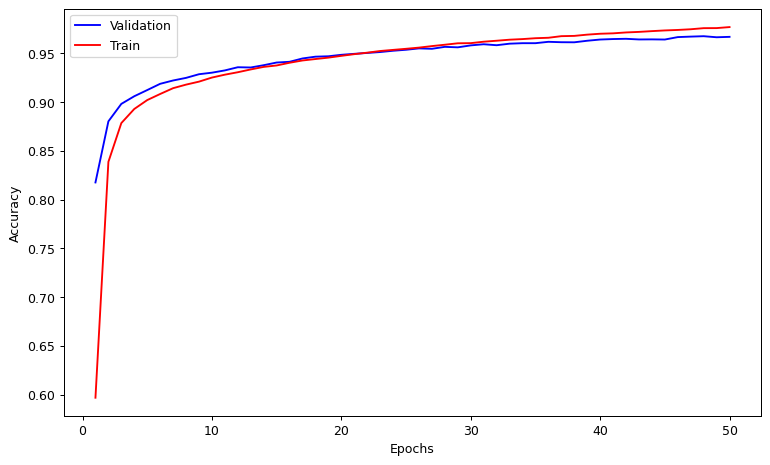

In [84]:
# График зависимости точности от номера эпохи
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

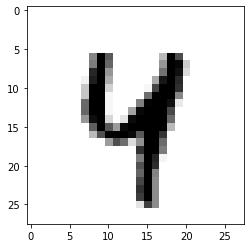

In [93]:
# Распознавание на элементах тестовой выборки
n_test = 42
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [94]:
# Меняем размерность изображения и нормализуем его
x = x_test[n_test]
x = np.expand_dims(x, axis=0)

In [95]:
# Распознаем цифру по значению вероятности
prediction = model.predict(x)
prediction

array([[5.1198118e-08, 1.1169284e-06, 2.1584208e-06, 6.0043541e-05,
        9.9231660e-01, 1.1555915e-06, 2.0971417e-07, 5.5055588e-04,
        1.1187162e-04, 6.9561447e-03]], dtype=float32)

In [96]:
# Преобразуем результат из формата one hot encoding
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 4
Название класса: 4


In [97]:
# Верный ответ
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 4
Название класса: 4


In [98]:
# Загрузка своих изображений
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

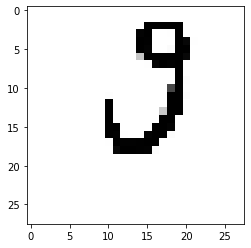

In [144]:
# Загрузка и отображение изображения
img0_path = '9.jpg'
img0 = image.load_img(img0_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img0.convert('RGBA'))
plt.show()

In [145]:
# Преобразование картинки для нейронной сети
# Преобразуем картинку в массив
x0 = image.img_to_array(img0)

In [146]:
# Меняем форму массива в плоский вектор
x0 = x0.reshape(1, 784)
# Инвертируем изображение
x0 = 255 - x0
# Нормализуем изображение
x0 /= 255

In [147]:
# Распознавание
prediction0 = model.predict(x0)
prediction0

array([[6.9143921e-03, 1.5975435e-03, 2.2491296e-01, 1.1382177e-02,
        9.0921402e-02, 2.7915591e-04, 1.9704250e-03, 1.4791047e-02,
        6.1443716e-02, 5.8578724e-01]], dtype=float32)

In [148]:
prediction0 = np.argmax(prediction0)
print("Номер класса:", prediction0)
print("Название класса:", classes[prediction0])

Номер класса: 9
Название класса: 9


Полносвязная нейронная сеть верно распознала только цифры 3, 4, 5, 6, 9. С другими конфигурациями функций точность сильно ниже.

2. Снова решите задачу распознавания рукописных цифр, используя для этого известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр. На этот раз примените не полносвязную, а сверточную нейронную сеть. Сравните полученные результаты работы сверточной нейронной сети с аналогичными результатами работы полносвязной нейронной сети.

In [1]:
# Подключение библиотек
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [2]:
# Список с названиями классов
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
batch_size = 100 # Размер мини-выборки
nb_classes = 10 # Количество классов изображений
nb_epoch = 25 # Количество эпох для обучения
img_rows, img_cols = 28, 28 # Размер изображений

In [6]:
# Загрузка изображений
(x_train, y_train), (x_test, y_test) = mnist.load_data()

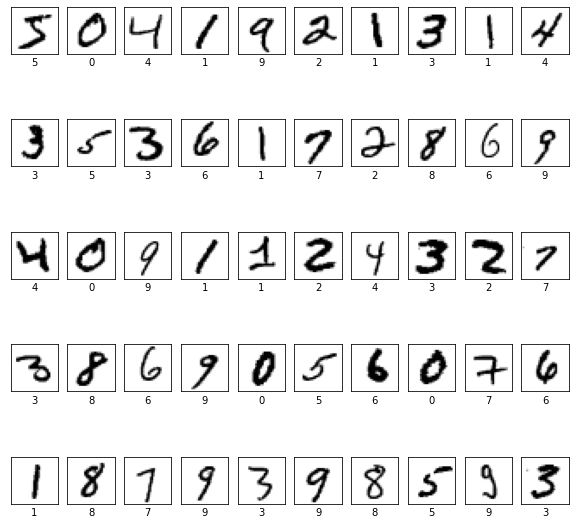

In [8]:
# Отображение части изображений
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [9]:
# Приведение значений интенсивности к интервалу [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# Отображение ответа
n = 7
print(y_train[n])

3


In [11]:
# Преобразование меток классов для обучения
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
# Другой вид ответа
print(y_train[n])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
# Построение сверточной нейронной сети

# Создаем последовательную модель нейронной сети
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(img_rows, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(img_rows, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(8 * img_rows, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [14]:
# Настройки модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 56)        28280     
                                                        

In [15]:
# Обучение нейронной сети
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/25
480/480 - 17s - loss: 0.2609 - accuracy: 0.9185 - val_loss: 0.0631 - val_accuracy: 0.9812 - 17s/epoch - 36ms/step
Epoch 2/25
480/480 - 3s - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.0400 - val_accuracy: 0.9885 - 3s/epoch - 6ms/step
Epoch 3/25
480/480 - 3s - loss: 0.0633 - accuracy: 0.9809 - val_loss: 0.0372 - val_accuracy: 0.9893 - 3s/epoch - 7ms/step
Epoch 4/25
480/480 - 3s - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0338 - val_accuracy: 0.9900 - 3s/epoch - 7ms/step
Epoch 5/25
480/480 - 3s - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0283 - val_accuracy: 0.9922 - 3s/epoch - 6ms/step
Epoch 6/25
480/480 - 3s - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0284 - val_accuracy: 0.9922 - 3s/epoch - 7ms/step
Epoch 7/25
480/480 - 3s - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0249 - val_accuracy: 0.9929 - 3s/epoch - 7ms/step
Epoch 8/25
480/480 - 3s - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0287 - val_accuracy: 0.9927 - 3s/epoch - 7ms/step
Epoch 9/25
480/480 - 

In [16]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 99.49%


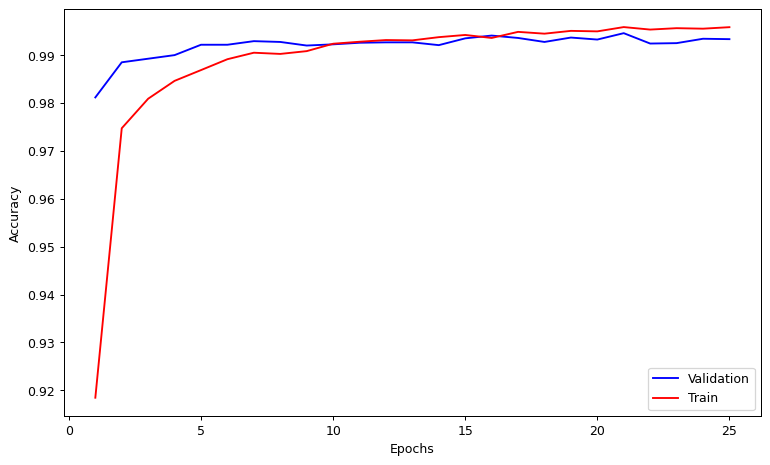

In [17]:
# График зависимости числа эпох от уровня точности
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

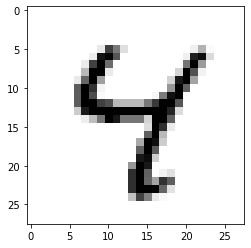

In [19]:
# Изображение тестовое
n_test = 6
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [20]:
# Запускаем распознавание и выводим результат
x = x_test[n_test]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

[[1.9718880e-14 2.6989313e-09 2.9014085e-12 5.2396309e-16 9.9998629e-01
  3.2524008e-11 3.6817438e-11 7.2399103e-10 3.4655907e-06 1.0203117e-05]]
Номер класса: 4
Название класса: 4


In [22]:
# Верный ответ
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 4
Название класса: 4


In [23]:
# Загрузка своих изображений
uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 8440 байт загружен(ы)
Файл(ы) "1.jpg" размером 8338 байт загружен(ы)
Файл(ы) "2.jpg" размером 9085 байт загружен(ы)
Файл(ы) "3.jpg" размером 8190 байт загружен(ы)
Файл(ы) "4.jpg" размером 8216 байт загружен(ы)
Файл(ы) "5.jpg" размером 8616 байт загружен(ы)
Файл(ы) "6.jpg" размером 9068 байт загружен(ы)
Файл(ы) "7.jpg" размером 8370 байт загружен(ы)
Файл(ы) "8.jpg" размером 8742 байт загружен(ы)
Файл(ы) "9.jpg" размером 7102 байт загружен(ы)


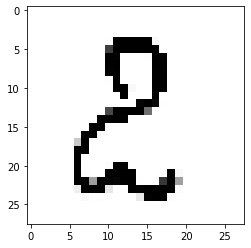

In [56]:
img_path = '2.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

In [57]:
x = image.img_to_array(img)
x = 255 - x
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

[[3.5170089e-07 3.1992905e-11 4.4648672e-04 1.8791660e-06 3.3188828e-15
  1.7726363e-10 1.0909855e-11 8.3235876e-13 9.9955124e-01 1.1236769e-09]]
Номер класса: 8
Название класса: 8


Сверточная нейронная сеть хуже всего распознала цифры 1 и 2. Сверточная нейронная сеть имеет более высокую точность и в 2 раза лучше справилась с распознаванием рукописных цифр.